In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os, glob, re
from neurocombat_sklearn import CombatModel
from Baselines.ComBat.neuroCombat import neuroCombat


In [2]:
openbhb_dir = "/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/"
roi_dir = os.path.join(openbhb_dir , "roi/")
debiased_roi_dir = os.path.join(openbhb_dir , "debiased_roi/")
labels_dir = os.path.join(openbhb_dir , "labels/")

f_participants = os.path.join(labels_dir, "participants.csv")
f_sites = os.path.join(labels_dir, "site_labels.csv")

roi_files = glob.glob(os.path.join(roi_dir, "*.csv"))
roi_files

['/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/desikan_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/destrieux_average_thickness_mm_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/normalized_vbm_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/vbm_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/destrieux_intrinsic_curvature_index_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/destrieux_gray_matter_volume_mm^3_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/desikan_gray_matter_volume_mm^3_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Project/Dataset/OpenBHB/roi/desikan_integrated_rectified_gaussian_curvature_mm^-2_roi.csv',
 '/Users/mansoor/Documents/GSU/Projects/Neuroimaging-Proje

In [42]:
desikan_thickness = pd.read_csv(roi_dir+'desikan_average_thickness_mm_roi.csv')
participants = pd.read_csv(f_participants)
sites = pd.read_csv(f_sites, index_col=False)
desikan_thickness.head()

,participant_id,average_thickness_mm_lh-bankssts,average_thickness_mm_lh-caudalanteriorcingulate,average_thickness_mm_lh-caudalmiddlefrontal,average_thickness_mm_lh-cuneus,average_thickness_mm_lh-entorhinal,average_thickness_mm_lh-fusiform,average_thickness_mm_lh-inferiorparietal,average_thickness_mm_lh-inferiortemporal,average_thickness_mm_lh-isthmuscingulate,...,average_thickness_mm_rh-rostralanteriorcingulate,average_thickness_mm_rh-rostralmiddlefrontal,average_thickness_mm_rh-superiorfrontal,average_thickness_mm_rh-superiorparietal,average_thickness_mm_rh-superiortemporal,average_thickness_mm_rh-supramarginal,average_thickness_mm_rh-frontalpole,average_thickness_mm_rh-temporalpole,average_thickness_mm_rh-transversetemporal,average_thickness_mm_rh-insula
0,973270677867,2062.0,4099.0,1574.0,3330.0,268.0,1348.0,2439.0,809.0,513.0,...,1.3,4.5,0.7,2.1,6.3,1.0,1.4,2.8,7.5,6.3
1,527550273544,1776.0,6073.0,1682.0,3830.0,266.0,2037.0,3303.0,914.0,751.0,...,0.9,5.8,0.8,1.7,5.2,1.5,1.8,2.4,6.8,6.2
2,812837651289,2006.0,4888.0,1401.0,3884.0,253.0,1650.0,1833.0,515.0,463.0,...,0.6,4.4,1.6,2.3,5.3,0.8,1.2,1.8,6.4,5.7
3,273799460640,1556.0,4432.0,1810.0,3442.0,311.0,1727.0,2684.0,775.0,440.0,...,1.2,7.7,1.3,1.8,6.8,1.1,1.8,2.5,8.1,6.4
4,886474070517,2092.0,4695.0,1586.0,4210.0,330.0,1604.0,2671.0,910.0,552.0,...,1.1,5.2,0.9,1.8,4.8,1.3,1.6,1.9,6.6,5.9


In [4]:
desikan_thickness_df = desikan_thickness.merge(sites.loc[:, ['participant_id', 'siteXacq']], on="participant_id")
desikan_thickness_df = desikan_thickness_df.merge(participants.loc[:,["participant_id", "sex", "age"]])
covariates = desikan_thickness_df.loc[:,["siteXacq", "sex", "age"]]
data = np.array(desikan_thickness_df.iloc[:,1:-3])


In [23]:
#  Run neuroCombat
desikan_thickness_harmonized, gamma_star, delta_star = neuroCombat(
    data=data,  # Your original data
    covars=covariates,  # DataFrame with both age and site
    batch_col="siteXacq",  # Column name for batch
    continuous_cols=["age"]  # List of continuous variable names
)

Creating design matrix..
Standardizing data across features..
Fitting L/S model and finding priors..
Finding parametric adjustments..
Final adjustment of data..


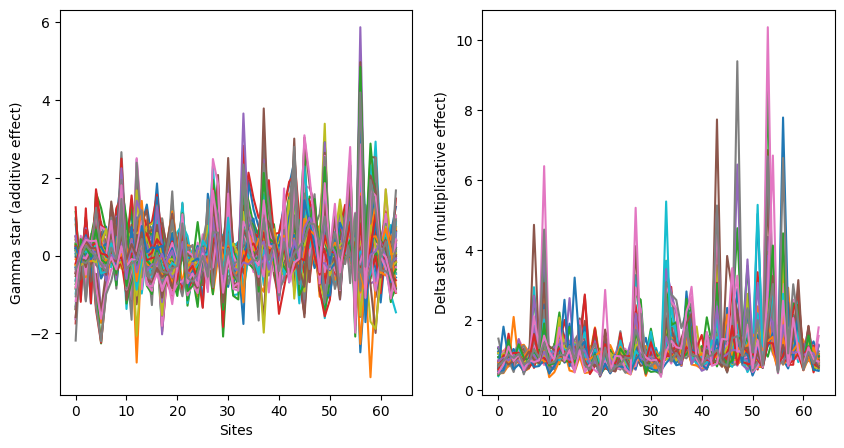

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.plot(gamma_star) # each line plot is corresponds to a feature
ax1.set_xlabel("Sites")
ax1.set_ylabel("Gamma star (additive effect)") 
ax2.plot(delta_star)
ax2.set_xlabel("Sites")
ax2.set_ylabel("Delta star (multiplicative effect)")
plt.show()


In [22]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,2062.0,4099.0,1574.0,3330.0,268.0,1348.0,2439.0,809.0,513.0,408.0,...,1.3,4.5,0.7,2.1,6.3,1.0,1.4,2.8,7.5,6.3
1,1776.0,6073.0,1682.0,3830.0,266.0,2037.0,3303.0,914.0,751.0,653.0,...,0.9,5.8,0.8,1.7,5.2,1.5,1.8,2.4,6.8,6.2
2,2006.0,4888.0,1401.0,3884.0,253.0,1650.0,1833.0,515.0,463.0,492.0,...,0.6,4.4,1.6,2.3,5.3,0.8,1.2,1.8,6.4,5.7
3,1556.0,4432.0,1810.0,3442.0,311.0,1727.0,2684.0,775.0,440.0,422.0,...,1.2,7.7,1.3,1.8,6.8,1.1,1.8,2.5,8.1,6.4
4,2092.0,4695.0,1586.0,4210.0,330.0,1604.0,2671.0,910.0,552.0,583.0,...,1.1,5.2,0.9,1.8,4.8,1.3,1.6,1.9,6.6,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,2550.0,5566.0,1694.0,3730.0,273.0,1797.0,2421.0,820.0,685.0,532.0,...,1.5,5.6,1.2,2.2,4.5,1.5,2.0,2.2,8.8,5.7
3980,2686.0,5142.0,1566.0,4171.0,275.0,1463.0,2748.0,895.0,506.0,445.0,...,1.0,7.8,1.9,3.5,10.0,2.1,1.9,5.5,12.0,6.5
3981,1837.0,5177.0,1550.0,3833.0,274.0,1712.0,2889.0,825.0,644.0,500.0,...,1.0,5.7,0.9,1.8,5.5,1.1,1.5,1.8,5.7,6.7
3982,2604.0,5640.0,1692.0,4034.0,300.0,1712.0,2582.0,1034.0,821.0,530.0,...,1.3,5.5,0.6,1.9,4.0,0.9,1.4,2.1,6.4,4.7


In [7]:
pd.DataFrame(desikan_thickness_harmonized)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,2133.394606,4268.191542,1633.160322,3450.757132,270.918538,1418.292668,2588.087684,841.200429,538.161722,408.229443,...,1.275865,4.328645,0.685353,2.050909,6.366524,0.930141,1.310382,2.732733,6.906225,6.190681
1,1693.254586,5741.784476,1615.308574,3729.878154,257.057977,1883.893601,3118.058113,842.970502,686.869456,646.301420,...,0.903531,6.348190,0.647380,1.560780,5.415410,1.553047,1.744313,2.334118,7.193892,6.341398
2,2160.622296,5024.653000,1522.393077,4033.478904,272.118597,1690.798015,2405.410879,709.242628,550.255746,536.635815,...,0.722967,4.622311,1.397575,2.379296,4.960706,0.915738,1.273164,1.677700,6.544795,5.661138
3,1679.198951,4384.673547,1691.490396,3421.985490,295.489144,1660.632061,2605.449263,803.766530,477.518404,424.997247,...,1.253375,6.914500,1.197417,1.771552,6.094393,1.113712,1.677146,2.242782,7.678630,5.666416
4,2103.831893,4634.997373,1593.971900,4110.404834,315.700501,1581.304496,2587.909773,876.202722,512.263620,573.011833,...,1.147536,5.530871,0.850106,1.906672,4.998741,1.325898,1.676309,2.208485,7.759225,6.454101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,2636.609730,5754.629181,1757.953131,3875.087716,276.773838,1854.132754,2569.550774,852.687228,711.232155,536.826599,...,1.479232,5.496920,1.335202,2.147972,4.388027,1.415925,1.910296,2.074840,8.328140,5.564794
3980,2576.431849,5293.286133,1560.993335,4122.730358,271.791671,1467.851849,2682.434050,912.856117,558.576927,443.106614,...,0.936982,6.082720,1.312910,3.020127,7.000095,1.733809,1.746926,4.236780,9.132592,5.583202
3981,1761.793719,4894.369166,1463.398934,3673.989689,268.613754,1659.288840,2605.747194,755.103040,587.070344,490.938478,...,0.982685,6.012462,0.827527,1.778494,5.900660,1.090249,1.493619,1.989628,6.347595,7.368737
3982,2624.296325,5547.301063,1643.311426,4023.418382,293.947018,1734.549309,2557.777143,1003.287745,816.402994,519.919635,...,1.472499,5.904262,0.645824,2.160730,4.427925,1.049248,1.483653,2.481052,7.516175,5.038110


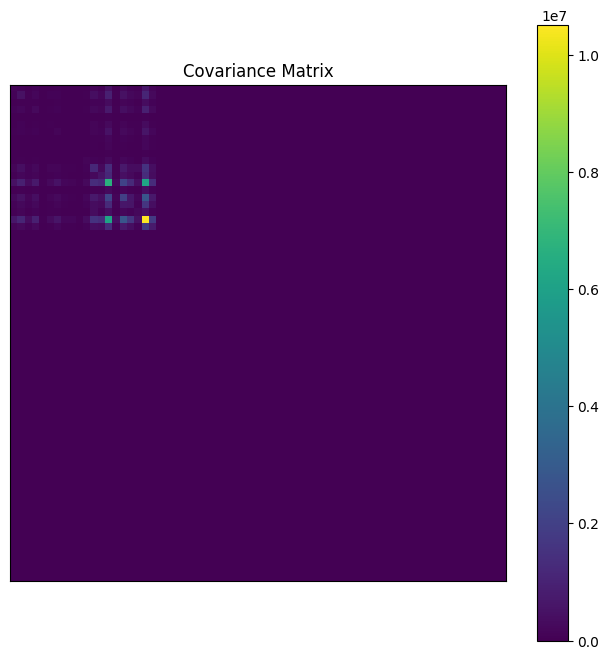

In [41]:
cov_matrix = np.cov(desikan_thickness_harmonized.T)  
plt.figure(figsize=(8,8))

plt.imshow(cov_matrix, cmap='viridis') 

plt.colorbar()

plt.xticks([])  # Replace with your variable names

plt.yticks([]) 

# plt.xlabel('Variables')

# plt.ylabel('Variables')

plt.title('Covariance Matrix')

plt.show()